In [88]:
# Part0 : Import package

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import model_from_json
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [89]:
# Part1 : Preprocess Data

X_train = np.load('image.npy')
X_train = X_train.astype('float32') / 255

#mean =  np.mean(X_train, axis=1)
#std = np.std(X_train, axis=1) + 1e-7
#X_train = ((X_train.T - mean) / std).T

encoding_dim = 64

In [90]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [91]:
mean =  np.mean(X_train, axis=1)
std = np.std(X_train, axis=1) + 1e-7
X_train = ((X_train.T - mean) / std).T

In [92]:
print(X_train)

[[-1.3152709  -1.3152709  -1.3152709  ... -1.3152709  -1.3152709
  -1.3152709 ]
 [-0.46839094 -0.46839094 -0.46839094 ... -0.46839094 -0.46839094
  -0.46839094]
 [-0.47833067 -0.47833067 -0.47833067 ...  2.532338   -0.47833067
  -0.47833067]
 ...
 [-0.41089982 -0.41089982 -0.41089982 ... -0.41089982 -0.41089982
  -0.41089982]
 [-0.46515426 -0.46515426 -0.46515426 ... -0.46515426 -0.46515426
  -0.46515426]
 [-0.5157537  -0.5157537  -0.5157537  ... -0.5157537  -0.5157537
  -0.5157537 ]]


In [93]:
'''
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
'''

"\nfrom keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D\nfrom keras.models import Model\nfrom keras import backend as K\n\ninput_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format\n\nx = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)\nx = MaxPooling2D((2, 2), padding='same')(x)\nx = Conv2D(8, (3, 3), activation='relu', padding='same')(x)\nx = MaxPooling2D((2, 2), padding='same')(x)\nx = Conv2D(8, (3, 3), activation='relu', padding='same')(x)\nencoded = MaxPooling2D((2, 2), padding='same')(x)\n\n# at this point the representation is (4, 4, 8) i.e. 128-dimensional\n\nx = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)\nx = UpSampling2D((2, 2))(x)\nx = Conv2D(8, (3, 3), activation='relu', padding='same')(x)\nx = UpSampling2D((2, 2))(x)\nx = Conv2D(16, (3, 3), activation='relu')(x)\nx = UpSampling2D((2, 2))(x)\ndecoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)\n\nautoencoder = Mode

In [94]:

# build model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784)(decoded)

#decoded = Dense(784, activation='sigmoid')(decoded)

# build encoder
encoder = Model(input=input_img, output=encoded)

# build autoencoder
adam = Adam(lr=5e-4)
autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer=adam, loss='mse')
autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_24 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_25 (Dense)             (None, 784)               101136    
Total para

C:\Users\chtti\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app
C:\Users\chtti\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [95]:
'''
# build model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784)(decoded)

#decoded = Dense(784, activation='sigmoid')(decoded)

# build encoder
encoder = Model(input=input_img, output=encoded)

# build autoencoder
adam = Adam(lr=5e-4)
autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer=adam, loss='mse')
autoencoder.summary()
'''

"\n# build model\ninput_img = Input(shape=(784,))\nencoded = Dense(128, activation='relu')(input_img)\nencoded = Dense(64, activation='relu')(encoded)\nencoded = Dense(32, activation='relu')(encoded)\n\ndecoded = Dense(64, activation='relu')(encoded)\ndecoded = Dense(128, activation='relu')(decoded)\ndecoded = Dense(784)(decoded)\n\n#decoded = Dense(784, activation='sigmoid')(decoded)\n\n# build encoder\nencoder = Model(input=input_img, output=encoded)\n\n# build autoencoder\nadam = Adam(lr=5e-4)\nautoencoder = Model(input=input_img, output=decoded)\nautoencoder.compile(optimizer=adam, loss='mse')\nautoencoder.summary()\n"

In [96]:
'''
# train autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val, x_val))
'''

'\n# train autoencoder\nautoencoder.fit(X_train, X_train,\n                epochs=50,\n                batch_size=256,\n                shuffle=True,\n                validation_data=(x_val, x_val))\n'

In [97]:
'''
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_center=False,
                             samplewise_std_normalization=False,
                             #horizontal_flip=True,
                             vertical_flip=False,  # randomly flip images
                             rotation_range=10,
                             shear_range=0.1,
                             zoom_range=0.1,
                             #rescale=1.1,
                             fill_mode='nearest',
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             #channel_shift_range=0.1,
                             validation_split=0.1)
'''

"\nfrom keras.preprocessing.image import ImageDataGenerator\n\ndatagen = ImageDataGenerator(featurewise_center=False,\n                             featurewise_std_normalization=False,\n                             samplewise_center=False,\n                             samplewise_std_normalization=False,\n                             #horizontal_flip=True,\n                             vertical_flip=False,  # randomly flip images\n                             rotation_range=10,\n                             shear_range=0.1,\n                             zoom_range=0.1,\n                             #rescale=1.1,\n                             fill_mode='nearest',\n                             width_shift_range=0.1,\n                             height_shift_range=0.1,\n                             #channel_shift_range=0.1,\n                             validation_split=0.1)\n"

In [98]:
#print(X_train.shape)

In [99]:
'''
input_shape = (140000,28, 28, 1)
X_train = X_train.reshape(input_shape)
'''

'\ninput_shape = (140000,28, 28, 1)\nX_train = X_train.reshape(input_shape)\n'

In [100]:
'''
datagen.fit(X_train)
X_train = X_train.reshape(140000,784)
'''

'\ndatagen.fit(X_train)\nX_train = X_train.reshape(140000,784)\n'

In [101]:
'''
autoencoder.fit_generator(datagen.flow(X_train, X_train, batch_size=256), 
                    steps_per_epoch=256, ## You should modify here !!
                    epochs=50,    
                    #validation_data=(X_valid, Y_valid),
                    workers=8,
                    shuffle=True)
'''

'\nautoencoder.fit_generator(datagen.flow(X_train, X_train, batch_size=256), \n                    steps_per_epoch=256, ## You should modify here !!\n                    epochs=50,    \n                    #validation_data=(X_valid, Y_valid),\n                    workers=8,\n                    shuffle=True)\n'

In [102]:
autoencoder.fit(X_train, X_train, nb_epoch=50, batch_size=256, shuffle=True, validation_split=0)


C:\Users\chtti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/50
140000/140000 [==============================] - 2s 14us/step - loss: 0.4229
Epoch 2/50
140000/140000 [==============================] - 2s 12us/step - loss: 0.2899
Epoch 3/50
140000/140000 [==============================] - 2s 12us/step - loss: 0.2590
Epoch 4/50
140000/140000 [==============================] - 2s 12us/step - loss: 0.2406
Epoch 5/50
140000/140000 [==============================] - 2s 12us/step - loss: 0.2292
Epoch 6/50
140000/140000 [==============================] - 2s 12us/step - loss: 0.2208
Epoch 7/50
140000/140000 [==============================] - 2s 12us/step - loss: 0.2143
Epoch 8/50
140000/140000 [==============================] - 2s 12us/step - loss: 0.2087
Epoch 9/50
140000/140000 [==============================] - 2s 13us/step - loss: 0.2049
Epoch 10/50
140000/140000 [==============================] - 2s 12us/step - loss: 0.2021
Epoch 11/50
140000/140000 [==============================] - 2s 12us/step - loss: 0.1998
Epoch 12/50
140000/140000 [===

In [103]:
'''
# Part2 : autoencoder

########################################
##  You need to complete this part.  ##
########################################

input_img = Input(shape=(28*28,))

x = Dense(...)(input_img)
#  .......
#  .......
#  .......
encoded_img = Dense(encoding_dim)(encoded)
x = Dense(...)(encoded_img)
#  .......
#  .......
#  .......

#output = Dense(28*28,...)(x)

autoencoder = Model(inputs=input_img, outputs=decoded)

encoder = Model(inputs=input_img, outputs=encoded_img)

autoencoder.compile(optimizer='adam', loss=...)
autoencoder.fit(X_train, X_train, nb_epoch=100, batch_size=128, shuffle=True, validation_split=0)


encoded_imgs = encoder.predict(X_train)
'''

"\n# Part2 : autoencoder\n\n########################################\n##  You need to complete this part.  ##\n########################################\n\ninput_img = Input(shape=(28*28,))\n\nx = Dense(...)(input_img)\n#  .......\n#  .......\n#  .......\nencoded_img = Dense(encoding_dim)(encoded)\nx = Dense(...)(encoded_img)\n#  .......\n#  .......\n#  .......\n\n#output = Dense(28*28,...)(x)\n\nautoencoder = Model(inputs=input_img, outputs=decoded)\n\nencoder = Model(inputs=input_img, outputs=encoded_img)\n\nautoencoder.compile(optimizer='adam', loss=...)\nautoencoder.fit(X_train, X_train, nb_epoch=100, batch_size=128, shuffle=True, validation_split=0)\n\n\nencoded_imgs = encoder.predict(X_train)\n"

In [104]:
encoded_imgs = encoder.predict(X_train)


In [105]:
'''
# Part2 : PCA

pca = PCA(n_components=encoding_dim)
encoded_imgs  = pca.fit_transform(X_train)
'''

'\n# Part2 : PCA\n\npca = PCA(n_components=encoding_dim)\nencoded_imgs  = pca.fit_transform(X_train)\n'

In [106]:
# Part3: Image Clustering

kmeans = KMeans(n_clusters=2).fit(encoded_imgs)
y = kmeans.labels_

In [107]:
# Part4:Predict testing data

test = pd.read_csv('test_case.csv')
n = len(test.index)
ans = np.zeros(n, dtype='int')

for i in range(n):
    image1 = test['image1_index'][i]
    image2 = test['image2_index'][i]
    if y[image1] == y[image2]:
        ans[i] = 1

In [108]:
# Part5: write output file

submit = pd.DataFrame({'Ans': ans})
submit.to_csv('ans.csv', index_label='ID')

In [ ]:
# bonus

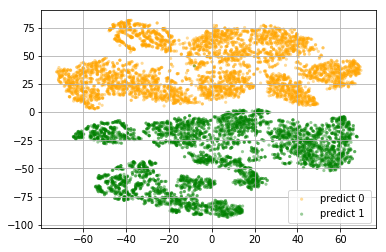

In [49]:
# Part6: visualize your prediction

# the visual_sample is in order to reduce the tsne calculation time

visual_sample = 10000
embedded = TSNE(n_components=2).fit_transform(encoded_imgs[0:visual_sample])
legend = ['predict 0 ','predict 1']

for i,color in enumerate(['orange', 'green']):
    _x = embedded[y[:visual_sample]==i,0]
    _y = embedded[y[:visual_sample]==i,1]
    plt.scatter(_x,_y, c=color, s=10, label=legend[i],
               alpha=0.4, edgecolors='none')

plt.legend()
plt.grid(True)
plt.show()

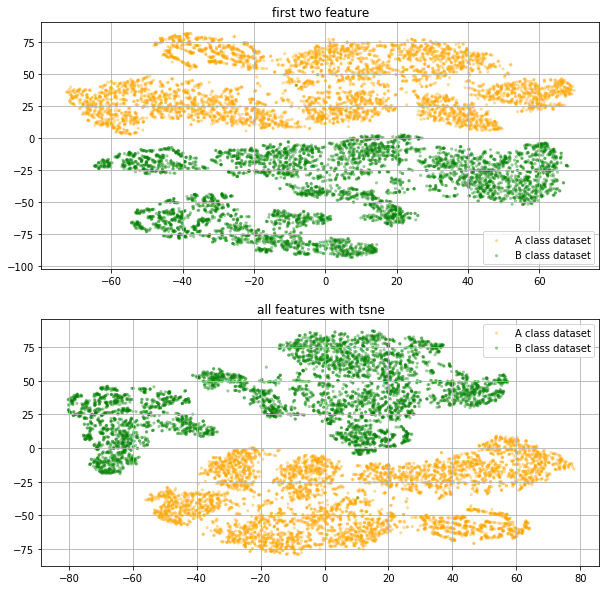

In [53]:
# Part7: visualization bonus

# show TA the result to get bonus point

visual = np.load('visualization.npy')

## visualize first two feature as (x , y)
fig, ax = plt.subplots(2,1,figsize=(10,10))
legend = ['A class dataset','B class dataset']
for i,color in enumerate(['orange', 'green']):
    _x = embedded[y[:visual_sample]==i,0]
    _y = embedded[y[:visual_sample]==i,1]
    ax[0].scatter(_x, _y, c=color, s=10, label=legend[i],
               alpha=0.4, edgecolors='none')
ax[0].title.set_text('first two feature')
ax[0].legend()
ax[0].grid(True)

## visualization with tsne
embedded = TSNE(n_components=2).fit_transform( encoded_imgs[0:visual_sample] )
legend = ['A class dataset','B class dataset']
for i,color in enumerate(['orange', 'green']):
    _x = embedded[y[:visual_sample]==i,0]
    _y = embedded[y[:visual_sample]==i,1]
    ax[1].scatter(_x, _y, c=color, s=10, label=legend[i],
               alpha=0.4, edgecolors='none')
ax[1].title.set_text('all features with tsne')
ax[1].legend()
ax[1].grid(True)
plt.show()
# you might have to save plt into image to see the result 
# if you are not using juypter notebook